<a href="https://colab.research.google.com/github/pccalegari/exemplos-CN/blob/main/unidade1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>





# Unidade 1 - Introdução: Algoritmos e erros




Nesta unidade, vamos discutir os tipos de erros cometidos em simulações numéricas. Além disso, vamos estudar a representação e a aritmética de ponto flutuante e calcular os erros cometidos. A seguir, apresentamos alguns exemplos discutidos durante a aula.

# Exemplo 1

Dado $n$, determnar a soma dos $n$ primeiros números naturais.

Solução:

Entrada: $n$
Saída: $$S = \sum_{i=1}^n i$$




Solução usando comando de repetição.

In [ ]:
print("Digite o valor de n")
n = int(input())
s = 0
for i in range(1,n+1):
  s += i
print("O valor da soma é", s)

Digite o valor de n
4
O valor da soma é 10


Solução direta usando fórmula. Vamos escrever $S = 1 + 2 + \ldots + n$ e somando as duas parcela abaixo,
$$\begin{array}{l}
S  = 1 + 2 + \ldots + n\\
S = n + n-1 + \ldots + 1
\end{array}$$
obtemos:
$$
2S = n(n+1)$$
Portanto,
$$S = n(n+1)/2$$

In [ ]:
n = int(input())
S = n*(n+1)/2
print(S)

7
28.0


# Exemplo 2

 Dado $n$, determinar a soma de $n$ números reais.

In [ ]:
n = int(input("Digite o valor de n: "))
s = 0.0
for i in range(n):
  r = np.float64(input('Digite um número real: '))
  s += r
print("O valor da soma é", s)

Digite o valor de n: 3
Digite um número real: 1.2
Digite um número real: 0.9
Digite um número real: 1.123
O valor da soma é 3.223


# Exemplo 3

 Calcular o valor $e^{0.5}$.

Solução: Usando série de Taylor, temos
    $$f(x+x_0)=f(x_0)+\sum_{k=1}^{\infty}\dfrac{f^k(x_0)}{k!}(x+x_0)^k,$$
    então, para valores de $x$ em uma vizinhança de $x_0=0$ temos
    $$e^x=1 + \sum_{k=1}^{\infty}\dfrac{x^k}{k!}.$$

Para obter uma solução precisamos "truncar" a série, fixando o valor máximo de $k$, ou seja,
$$e^x\approx 1 + \sum_{k=1}^{n}\dfrac{x^k}{k!}.$$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


print("Digite o valor de x, para o cálculo de e^x:")
x = float(input())

print("Digite o número de termo da série, para o cálculo da exponencial")
n = int(input())

s = 1
i = 1
f = 1
er = []
ex = []
while(i < n+1):
  f *= i # f = f*i
  s += (x**i)/f # s = s + (x**i)/f
  #print("Python: e^x = ",np.exp(x))
  #print("Truncado: e^x = ", s)
  er.append(abs(np.exp(x) - s)/abs(np.exp(x)))
  ex.append(i)
  i += 1

print("Erro: |e_p - e_t| = ", abs(np.exp(x) - s))

print("Erro relativo: |e_p - e_t|/|e_p| = ", abs(np.exp(x) - s)/abs(np.exp(x)))



Digite o valor de x, para o cálculo de e^x:
1
Digite o número de termo da série, para o cálculo da exponencial
10
Erro: |e_p - e_t| =  2.7312660577649694e-08
Erro relativo: |e_p - e_t|/|e_p| =  1.0047766310211053e-08


Gráfico do erro

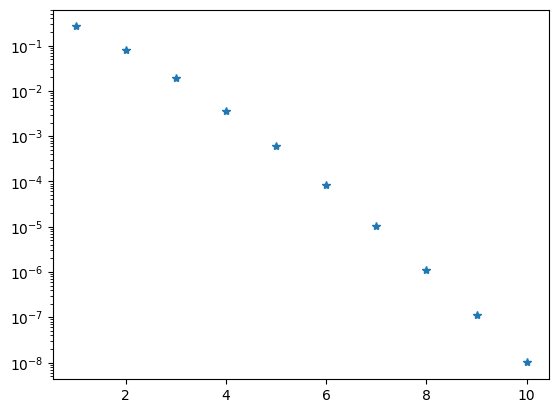

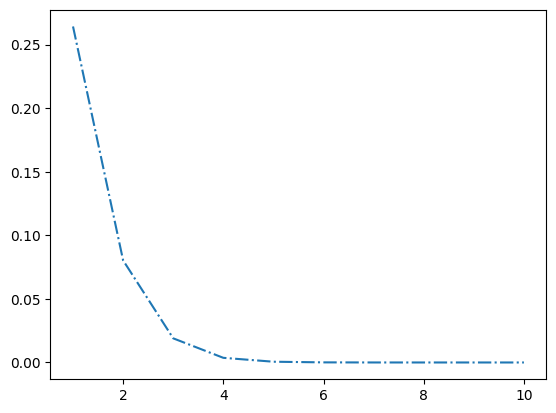

In [ ]:
plt.figure(1)
plt.semilogy(ex,er,'*')

plt.figure(2)
plt.plot(ex,er,'-.')

# Exemplo 4

Representação de números na base binária:

$$23 = 1\times 2^4 + 0\times 2^3 + 1\times 2^2 + 1\times 2^1 + 1\times 2^0$$

Algoritmo:

entrada: $n$ (base decimal)

saída: $b$ (base binária)





In [ ]:
n = int(input())
b = 0
i = 0
q = 1

while(q > 0):
  q = n//2
  r = n%2
  b = b + r*(10**i)
  i = i + 1
  n = q
print(b)

13
1101




# Exemplo 5

Algoritmo: precisão da máquina

In [ ]:
eps = 1
while(eps + 1 > 1):
  eps = eps/2
print("precisão:", eps)


precisão: 1.1102230246251565e-16


# Exemplo 6

Erros e Normas:

In [ ]:
import numpy as np
import numpy.linalg as la

x = 1.13245
y = 1.13244

dif = abs(x-y)

x_sp = np.float32(x)
y_sp = np.float32(y)

dif_sp = abs(x_sp - y_sp)

x_dp = np.float64(x)
y_dp = np.float64(y)
dif_dp = abs(x_dp - y_dp)

print("|x - y|=",dif,"|x-y|_sp=",dif_sp,"|x-y|_dp=",dif_dp)

z = np.array([1,2,5,4,3])
n2z = la.norm(z, 2)
nmax = la.norm(z, np.inf)

print("||z||_2=",n2z," ","||z||_max=",nmax)


|x - y|= 1.0000000000065512e-05 |x-y|_sp= 1.001358e-05 |x-y|_dp= 1.0000000000065512e-05
||z||_2= 7.416198487095663   ||z||_max= 5.0
